<a href="https://colab.research.google.com/github/armandoordonez/eda_couse/blob/main/Pipeline_Experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Based on https://towardsdatascience.com/pipelines-custom-transformers-in-scikit-learn-the-step-by-step-guide-with-python-code-4a7d9b068156

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import FeatureUnion, Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression

In [57]:
url = 'https://github.com/carlosjara/MCD_FAII/blob/main/FAII/Talleres/Taller_Practico/data/df_train.csv?raw=true'
#data = pd.read_excel("content/datosEmpleo.xlsx",index_col='mes',parse_dates=True)
df = pd.read_csv(url, sep=';')
print(df.shape)
df.head(3)

(1000, 42)


,GENERO,ESTADO_CIVIL,FECHA_NACIMIENTO,CODIGO_SEDE,MULTI_CANCER,CESION,RIESGOS,CANCER_MAMA_FAMILIAR,CANCER_OTRO_SITIO,CANCER_OTRO_SITIO_FAMILIAR,...,quimioterapias__cancer,hormonoterapias__cancer,cuidado_palitiavo__cancer,inmunoterapias_cancer,Citas_oncologicas_cancer,psiquiatria_cancer,psicologia_cancer,nutricion_cancer,atencion_nutricion,ID
0,F,SO,"9/2/1954, 7:00:00 p. m.",1.007,-,0,4,0,0,0,...,0,0,0,0,2,1,0,1,Una servicio nutricion,4.380
1,F,CA,"16/6/1958, 7:00:00 p. m.",2.011,-,1,1,0,0,0,...,0,0,0,0,0,0,0,0,Sin servicios nutricion,2.998
2,F,SO,"11/3/1951, 7:00:00 p. m.",1.052,-,0,2,0,0,0,...,0,0,0,0,2,0,0,0,Sin servicios nutricion,6.188


In [3]:
df.shape

(1000, 42)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CODIGO_SEDE,1000.0,1.782758,3.692619,0.0,1.01500,1.0515,1.10825,29.011
CESION,1000.0,0.086000,0.280504,0.0,0.00000,0.0000,0.00000,1.000
RIESGOS,1000.0,1.549000,1.181946,0.0,1.00000,1.0000,2.00000,6.000
CANCER_MAMA_FAMILIAR,1000.0,0.084000,0.277527,0.0,0.00000,0.0000,0.00000,1.000
CANCER_OTRO_SITIO,1000.0,0.192000,0.394070,0.0,0.00000,0.0000,0.00000,1.000
CANCER_OTRO_SITIO_FAMILIAR,1000.0,0.183000,0.386860,0.0,0.00000,0.0000,0.00000,1.000
CEREBRAL_FAMILIAR,1000.0,0.018000,0.133018,0.0,0.00000,0.0000,0.00000,1.000
IV_NIVEL,1000.0,5.398000,9.513259,0.0,0.00000,1.0000,6.00000,58.000
HOSPI_NO_QUIRURGICA,1000.0,0.035000,0.368661,0.0,0.00000,0.0000,0.00000,6.000
URGENCIAS,1000.0,0.020000,0.235915,0.0,0.00000,0.0000,0.00000,5.000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   GENERO                      1000 non-null   object 
 1   ESTADO_CIVIL                1000 non-null   object 
 2   FECHA_NACIMIENTO            1000 non-null   object 
 3   CODIGO_SEDE                 1000 non-null   float64
 4   MULTI_CANCER                1000 non-null   object 
 5   CESION                      1000 non-null   int64  
 6   RIESGOS                     1000 non-null   int64  
 7   CANCER_MAMA_FAMILIAR        1000 non-null   int64  
 8   CANCER_OTRO_SITIO           1000 non-null   int64  
 9   CANCER_OTRO_SITIO_FAMILIAR  1000 non-null   int64  
 10  CEREBRAL_FAMILIAR           1000 non-null   int64  
 11  FECHA_DATOS_PESO_TALLA      1000 non-null   object 
 12  PESO                        1000 non-null   object 
 13  TALLA                       1000 n

**II. Understanding**



In [6]:
df.GENERO.unique()

array(['F', 'M'], dtype=object)

<Axes: xlabel='GENERO', ylabel='count'>

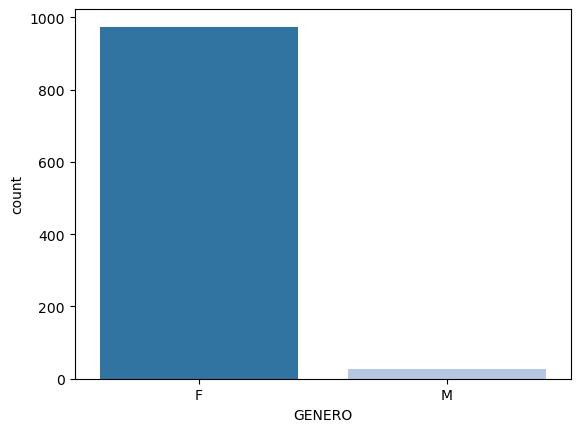

In [7]:
sns.countplot(
    x=df.GENERO,
    palette='tab20'
)

In [8]:
df.ESTADO_CIVIL.unique()

array(['SO', 'CA', 'SE', 'UL', 'VI'], dtype=object)

<Axes: xlabel='ESTADO_CIVIL', ylabel='count'>

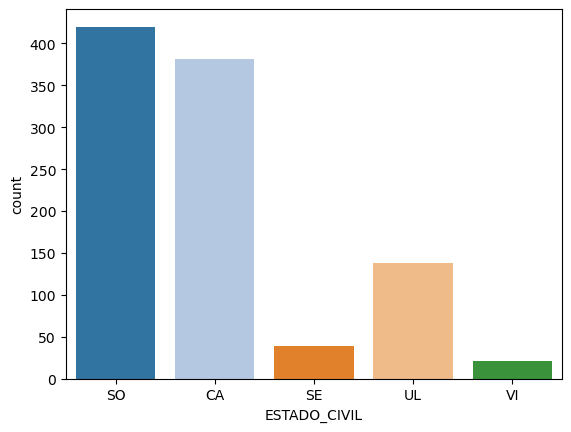

In [9]:
sns.countplot(
    x=df.ESTADO_CIVIL,
    palette='tab20'
)


In [10]:
df.MULTI_CANCER.unique()

array(['-', '1', '2'], dtype=object)

In [11]:
df.PESO.unique()
df.PESO=pd.to_numeric(df.PESO,errors='coerce')

In [12]:

# Definir los límites de los grupos
grupos= [30, 50, 70, 90, 110, 130]

# Definir las etiquetas de los grupos
etiquetas = ['30-50', '50-70', '70-90', '90-110', '110-130']

# Crear una nueva columna en el DataFrame que contenga las categorías de los pesos
df_peso= pd.cut(df['PESO'], bins=grupos, labels=etiquetas, right=False)

# Contar cuántas observaciones hay en cada categoría
pesos_agrupados = df_peso.value_counts().sort_index()

print(pesos_agrupados)


PESO
30-50       49
50-70      564
70-90      233
90-110      29
110-130      1
Name: count, dtype: int64


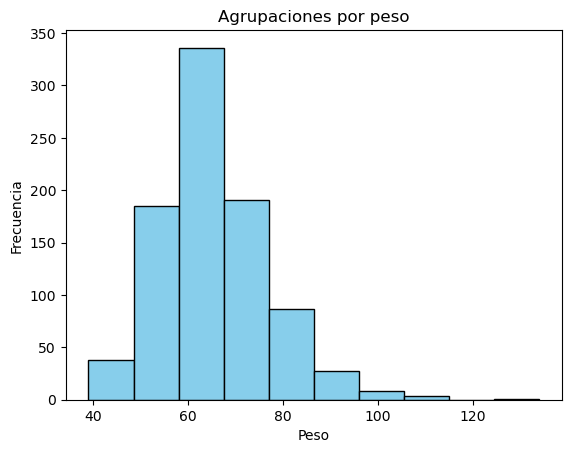

In [13]:
df_peso = df['PESO']

# Crear el histograma
plt.hist(df_peso, color='skyblue', edgecolor='black')

# Etiquetas y título
plt.xlabel('Peso')
plt.ylabel('Frecuencia')
plt.title('Agrupaciones por peso')

# Mostrar el gráfico
plt.show()

In [ ]:
df.TALLA.value_counts() #pdte -> imputar

In [15]:
df_clean = df[df['TALLA'] != '-']
df_clean['TALLA'] = pd.to_numeric(df_clean['TALLA'], errors='coerce')

# Definir los límites de los grupos
grupos = [130, 150, 170, 190]

# Definir las etiquetas de los grupos
etiquetas = ['130-150', '150-170', '170-190']

# Crear una nueva columna en el DataFrame que contenga las categorías de las tallas
df_talla = pd.cut(df_clean['TALLA'], bins=grupos, labels=etiquetas)#, right=False)

# Contar cuántas observaciones hay en cada categoría
talla_agrupados = df_talla.value_counts().sort_index()

print(talla_agrupados)

TALLA
130-150    207
150-170    731
170-190     24
Name: count, dtype: int64


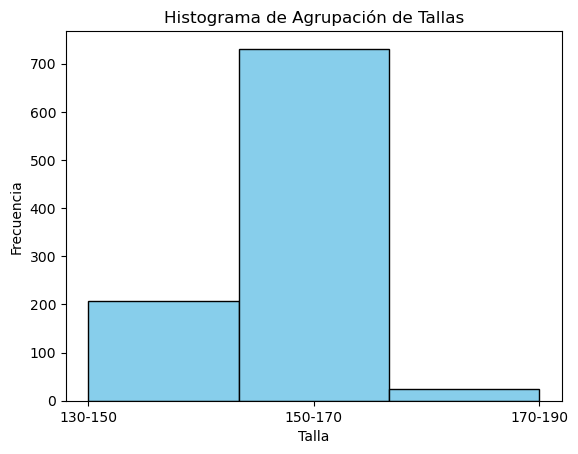

In [16]:
plt.hist(talla_agrupados.index, bins=len(talla_agrupados), weights=talla_agrupados.values, color='skyblue', edgecolor='black')

# Etiquetas y título
plt.xlabel('Talla')
plt.ylabel('Frecuencia')
plt.title('Histograma de Agrupación de Tallas')

# Mostrar el gráfico
plt.show()

In [17]:
df.URGENCIAS.unique()

array([0, 1, 2, 4, 5], dtype=int64)

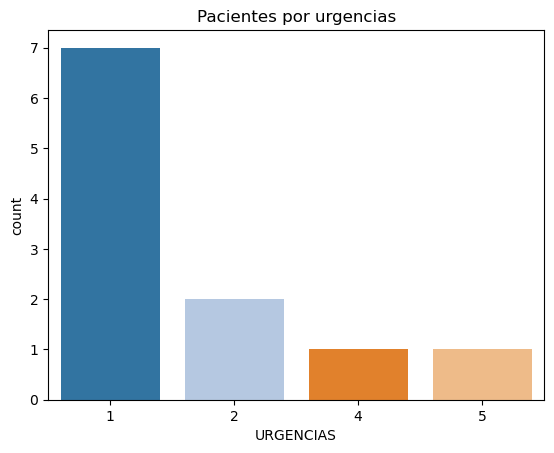

In [18]:
filtered_df = df[df['URGENCIAS'] > 0]
sns.countplot(x=filtered_df['URGENCIAS'], palette='tab20')
plt.title('Pacientes por urgencias')
plt.show()

In [ ]:
pd.crosstab(index=df['CANCER_MAMA_FAMILIAR'],columns='count')
pd.crosstab(index=df['CANCER_OTRO_SITIO'],columns='count')
pd.crosstab(index=df['CANCER_OTRO_SITIO_FAMILIAR'],columns='count')
pd.crosstab(index=df['CEREBRAL_FAMILIAR'],columns='count')

# Antecedentes

(1000, 4)


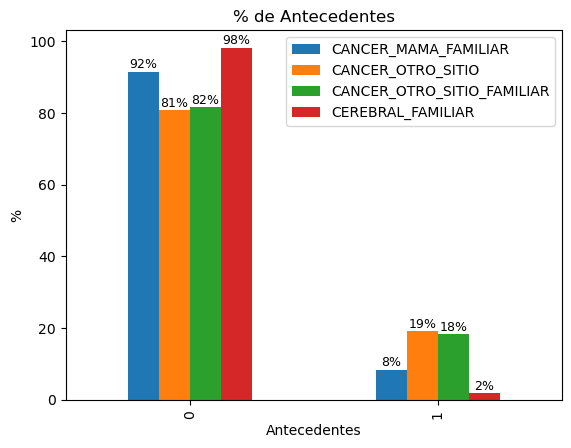

In [23]:
df_cancer = df[['CANCER_MAMA_FAMILIAR','CANCER_OTRO_SITIO','CANCER_OTRO_SITIO_FAMILIAR','CEREBRAL_FAMILIAR']]
print(df_cancer.shape)
porcentaje = df_cancer.apply(lambda x: x.value_counts(normalize=True) * 100)
ax = porcentaje.plot(kind='bar')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Antecedentes')
plt.ylabel('%')
plt.title('% de Antecedentes')

plt.show()

In [ ]:
#Presión Sistolica y diastolica (Contrae y relaja)
df.TSISTOLICA.unique() 
df.TDIASTOLICA.unique()

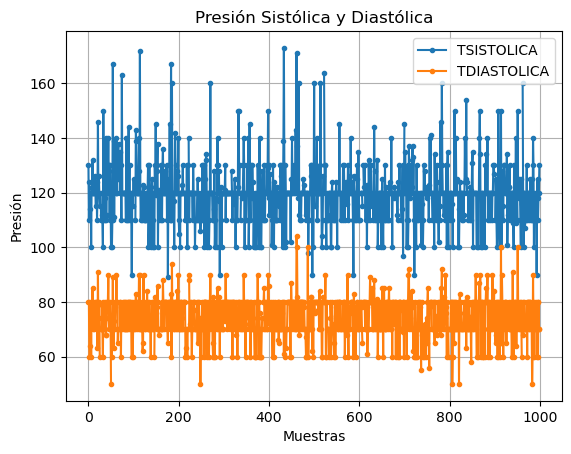

In [31]:
# Reemplazar los '-' con NaN para poder graficar
df.replace('-', float('nan'), inplace=True)
# Convertir las columnas a tipo numérico
df['TSISTOLICA'] = pd.to_numeric(df['TSISTOLICA'])
df['TDIASTOLICA'] = pd.to_numeric(df['TDIASTOLICA'])

# Graficar
plt.plot(df.index, df['TSISTOLICA'], marker='.', label='TSISTOLICA')
plt.plot(df.index, df['TDIASTOLICA'], marker='.', label='TDIASTOLICA')
plt.xlabel('Muestras')
plt.ylabel('Presión')
plt.title('Presión Sistólica y Diastólica')
plt.legend()
plt.grid(True)
plt.show()

## to_datetime

In [68]:
# Convertir la columna de fecha de nacimiento al formato de fecha
df['FECHA_NACIMIENTO'] = pd.to_datetime(df['FECHA_NACIMIENTO'])
df['FECHA_DATOS_PESO_TALLA']=pd.to_datetime(df['FECHA_DATOS_PESO_TALLA'])
df['Fecha_cero']=pd.to_datetime(df['Fecha_cero'])

In [70]:
df['Fecha_cero'].dtype

dtype('<M8[ns]')

In [42]:
# Calcular la edad de las mujeres a hoy
from datetime import datetime
today = datetime.now()
df['Edad'] = today.year - df['FECHA_NACIMIENTO'].dt.year

# Edades de los pacientes

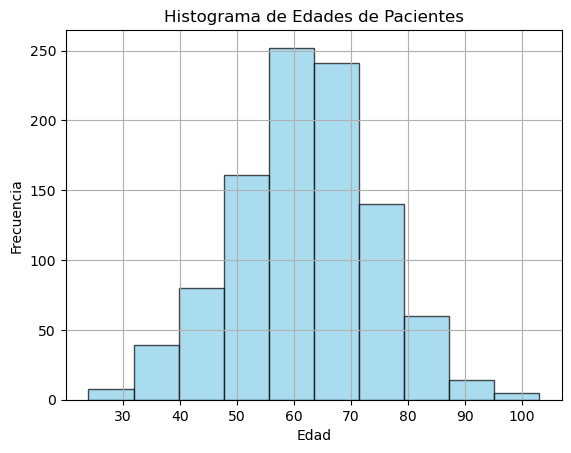

In [45]:
# Graficar un histograma de edades de las mujeres
plt.hist(df['Edad'], bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de Edades de Pacientes')
plt.grid(True)
plt.show()

# Complicaciones

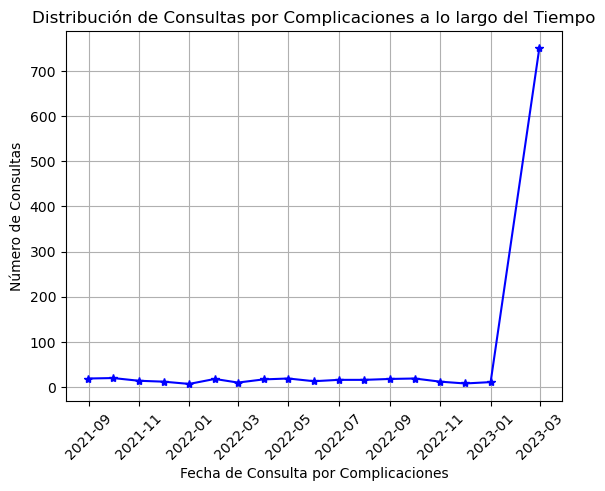

In [54]:
# Contar el número de consultas por complicaciones por cada día
consulta_por_dia = df['Fecha_cero'].value_counts().sort_index()

# Graficar un diagrama de líneas de la distribución de fechas de consulta por complicaciones
plt.plot(consulta_por_dia.index, consulta_por_dia.values, marker='*', color='blue')
plt.xlabel('Fecha de Consulta por Complicaciones')
plt.ylabel('Número de Consultas')
plt.title('Distribución de Consultas por Complicaciones a lo largo del Tiempo')
plt.xticks(rotation=45) 
plt.grid(True)
plt.show()

In [ ]:
# Convertir las columnas a tipo numérico (float)
columnas_NUMER = ['mes_1', 'mes_2', 'mes_3', 'mes_4', 'mes_5', 'mes_6', 'PESO', 'TALLA', 'TDIASTOLICA','TSISTOLICA','valor_servicio']
df[columnas_NUMER] = df[columnas_NUMER].apply(pd.to_numeric, errors='coerce')
print(df.dtypes)


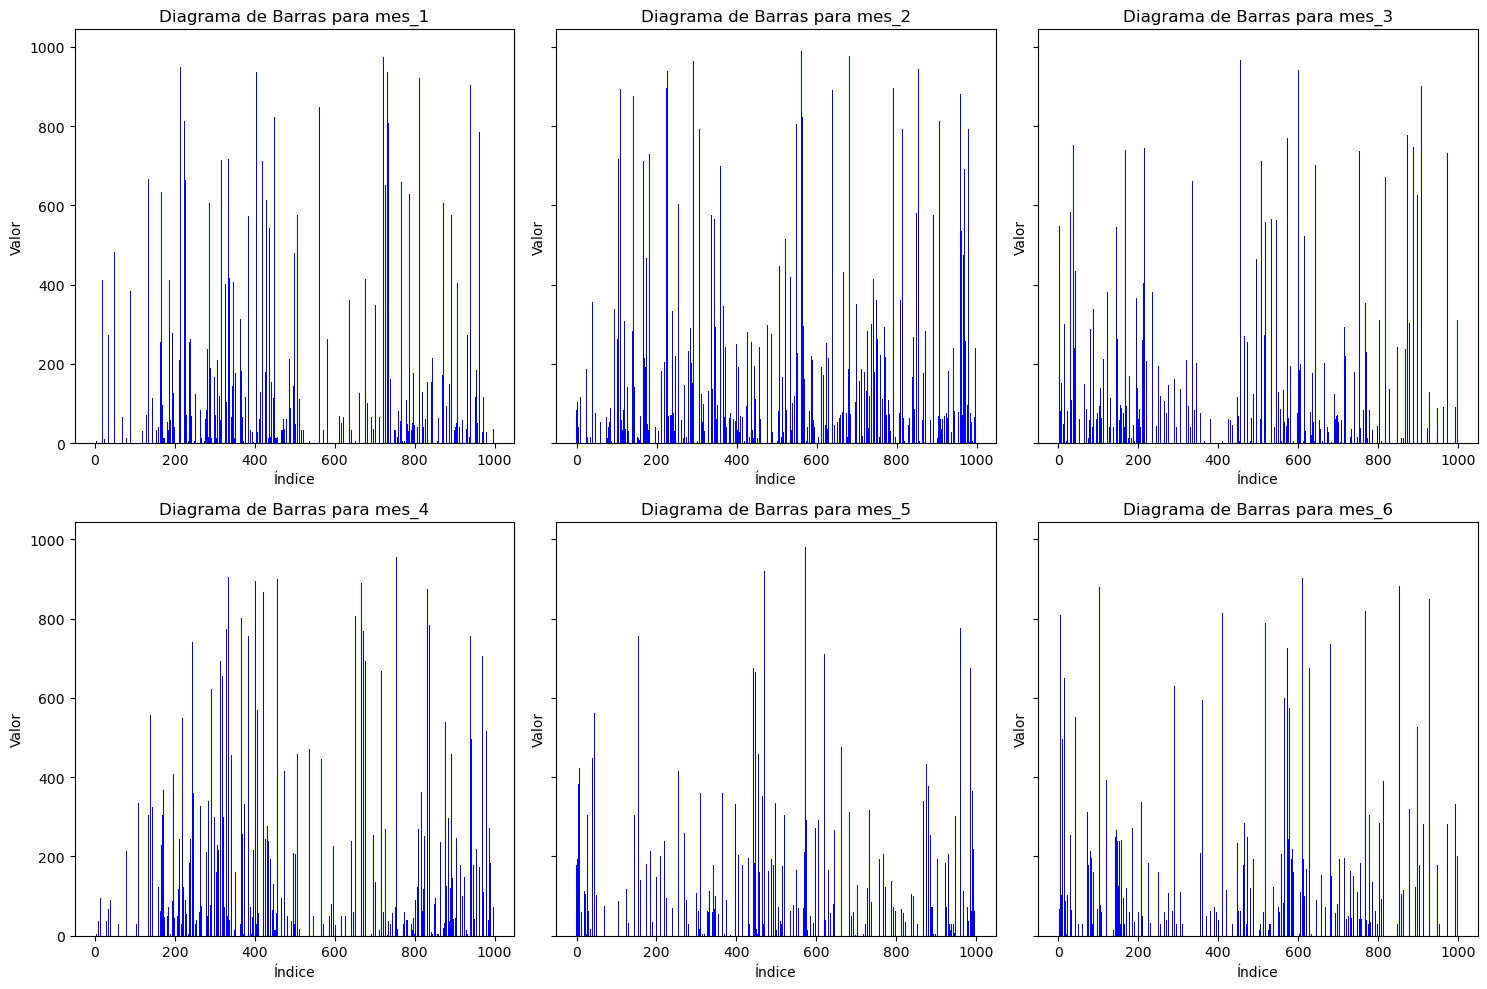

In [73]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10), sharey=True)

# Definir los meses
meses = ['mes_1', 'mes_2', 'mes_3', 'mes_4', 'mes_5', 'mes_6']

# Iterar sobre los ejes y los meses para graficar
for i, ax in enumerate(axs.flat):
    mes_actual = meses[i]
    ax.bar(df.index, df[mes_actual], color='blue')
    ax.set_title(f'Diagrama de Barras para {mes_actual}')
    ax.set_xlabel('Índice')
    ax.set_ylabel('Valor')

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()